# HR Attrition using Data science

## Problem Statement:
HR attrition is a critical issue for organizations, leading to significant financial losses, reduced productivity, and decreased morale among the remaining employees. Identifying the key factors that contribute to employee turnover and predicting the likelihood of attrition can help organizations proactively take steps to retain their employees and reduce the attrition rate. Therefore, the objective of this project is to develop a predictive model that can accurately forecast the likelihood of employee attrition based on various HR data points.

## Project Overview:
The project will involve analyzing HR data to determine the factors that contribute to employee attrition. The dataset will contain information about employee demographics, job characteristics, performance metrics, compensation and benefits, and other relevant variables. The dependent variable will be the attrition rate, which indicates whether an employee has left the organization or not. The model will be trained on historical data and will predict the likelihood of attrition for new employees.

### The project will involve the following steps:

* Data Collection: The first step is to gather HR data from various sources and create a comprehensive dataset that includes all the relevant variables.

* Data Cleaning and Preparation: The data will be cleaned and preprocessed to remove any inconsistencies, missing values, and outliers. Feature engineering techniques will be applied to transform the data and create new features that may be useful in predicting attrition.

* Exploratory Data Analysis: The data will be visualized and analyzed to identify any patterns, trends, or correlations that may exist between the variables and the attrition rate.

* Model Development: Various machine learning algorithms will be applied to the dataset to develop a predictive model that can accurately forecast the likelihood of attrition. The model will be evaluated using appropriate performance metrics and fine-tuned using hyperparameter optimization techniques.

* Model Deployment: The final step is to deploy the model into a production environment, where it can be used to predict the likelihood of attrition for new employees and provide insights that can help organizations make informed decisions about employee retention.

In [1]:
#import modules
import pandas as pd  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder

import numpy as np 
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [3]:
data.shape

(1628, 29)

In [4]:
data.dtypes

Id                          int64
Age                         int64
Attrition                   int64
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
CommunicationSkill          int64
Behaviour                   int64
dtype: object

In [11]:
def rename_columns(data):
    data = data.rename(columns = {'Id':'Id',
                              'Age':'Age','Attrition':'Attrition',
                              'BusinessTravel':'Business_Travel',
                              'Department':'Department',
                              'DistanceFromHome':'Distance_From_Home',
                              'Education':'Education',
                              'EducationField':'Education_Field',
                              'EmployeeNumber':'Employee_Number',
                              'EnvironmentSatisfaction':'Environment_Satisfaction',
                              'Gender':'Gender',
                              'JobInvolvement':'Job_Involvement',
                              'JobRole':'Job_Role',
                              'JobSatisfaction':'Job_Satisfaction',
                              'MaritalStatus':'Marital_Status',
                              'MonthlyIncome':'Monthly_Income',
                              'NumCompaniesWorked':'Number_Of_Companies_Worked',
                              'OverTime':'Over_Time',
                              'PercentSalaryHike':'Percent_Salary_Hike',
                              'PerformanceRating':'Performance_Rating',
                              'StockOptionLevel':'Stock_Option_Level',
                              'TotalWorkingYears':'Total_Working_Years',
                              'TrainingTimesLastYear':'Training_Times_Last_Year',
                              'YearsAtCompany':'Years_At_Company',
                              'YearsInCurrentRole':'Years_In_Current_Role',
                              'YearsSinceLastPromotion':'Years_Since_Last_Promotion',
                              'YearsWithCurrManager':'Years_With_Current_Manager',
                              'CommunicationSkill':'Communication_Skill',
                              'Behaviour':'Behaviour'
                              })
    return data

In [12]:
data = rename_columns(data)

# Data Insights (Exploratory data analysis)

In [13]:
data.columns

Index(['Id', 'Age', 'Attrition', 'Business_Travel', 'Department',
       'Distance_From_Home', 'Education', 'Education_Field', 'Employee_Number',
       'Environment_Satisfaction', 'Gender', 'Job_Involvement', 'Job_Role',
       'Job_Satisfaction', 'Marital_Status', 'Monthly_Income',
       'Number_Of_Companies_Worked', 'Over_Time', 'Percent_Salary_Hike',
       'Performance_Rating', 'Stock_Option_Level', 'Total_Working_Years',
       'Training_Times_Last_Year', 'Years_At_Company', 'Years_In_Current_Role',
       'Years_Since_Last_Promotion', 'Years_With_Current_Manager',
       'Communication_Skill', 'Behaviour'],
      dtype='object')

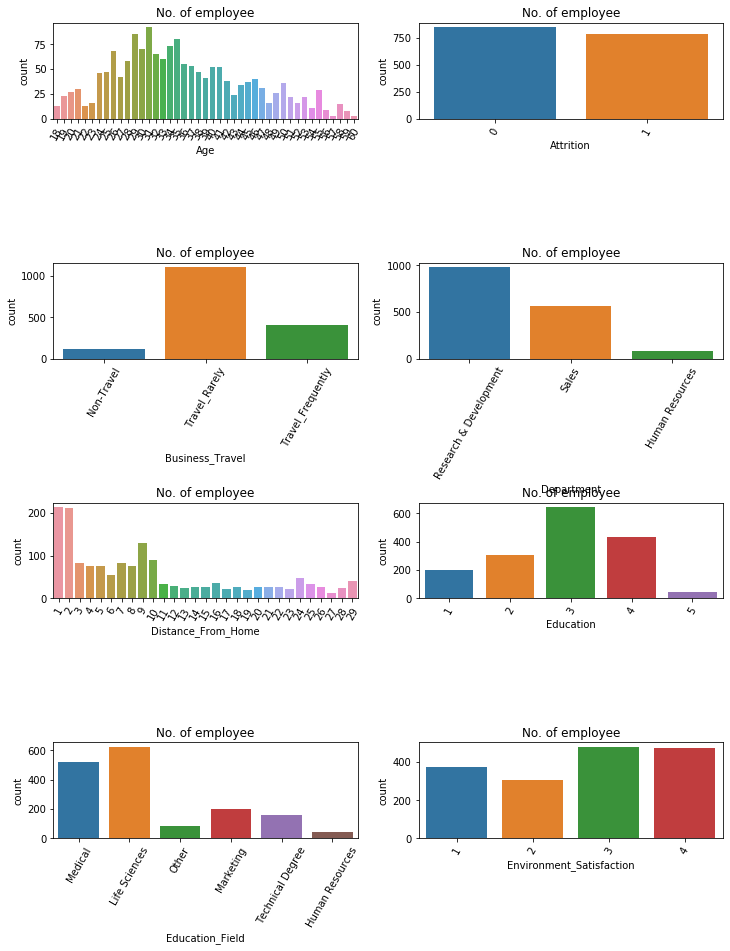

In [14]:
features=['Age', 'Attrition', 'Business_Travel', 'Department','Distance_From_Home','Education', 'Education_Field','Environment_Satisfaction']

fig = plt.subplots(figsize=(12,15))

for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.5)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=60)
    plt.title("No. of employee")

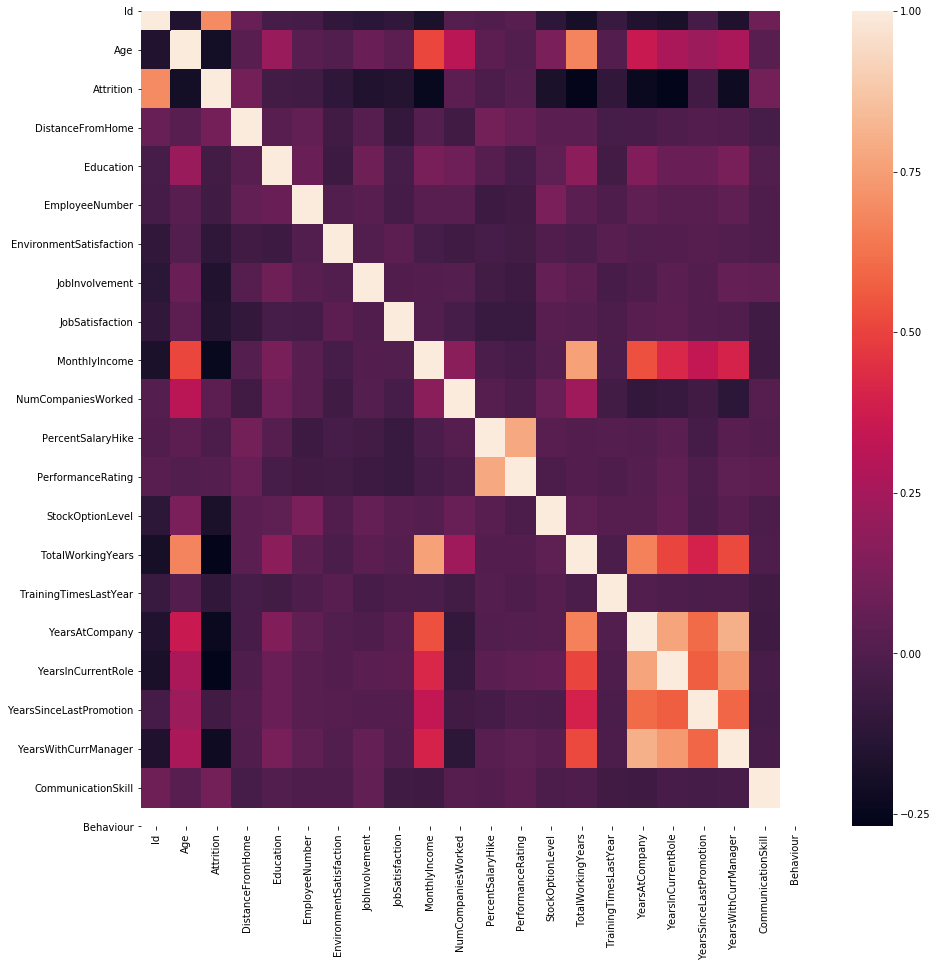

In [36]:
corr = data.corr()
plt.figure(figsize= (15,15))
sns.heatmap(corr)


In [15]:
data.columns

Index(['Id', 'Age', 'Attrition', 'Business_Travel', 'Department',
       'Distance_From_Home', 'Education', 'Education_Field', 'Employee_Number',
       'Environment_Satisfaction', 'Gender', 'Job_Involvement', 'Job_Role',
       'Job_Satisfaction', 'Marital_Status', 'Monthly_Income',
       'Number_Of_Companies_Worked', 'Over_Time', 'Percent_Salary_Hike',
       'Performance_Rating', 'Stock_Option_Level', 'Total_Working_Years',
       'Training_Times_Last_Year', 'Years_At_Company', 'Years_In_Current_Role',
       'Years_Since_Last_Promotion', 'Years_With_Current_Manager',
       'Communication_Skill', 'Behaviour'],
      dtype='object')

# Data preprocessing

In [16]:
# Column name cleaning

column = ['Business_Travel', 'Department',
       'Education', 'Education_Field', 
       'Environment_Satisfaction', 'Gender', 'Job_Involvement', 'Job_Role',
       'Job_Satisfaction', 'Marital_Status', 
       'Number_Of_Companies_Worked', 'Over_Time', 'Percent_Salary_Hike',
       'Performance_Rating', 'Stock_Option_Level', 
       'Training_Times_Last_Year',  'Years_In_Current_Role',
       'Years_Since_Last_Promotion', 'Years_With_Current_Manager', 'Communication_Skill',
       'Behaviour']
df_cat = data[column]
column = df_cat.columns
column

# Converting categorical variables
df_cat = pd.get_dummies(df_cat, columns=['Business_Travel', 'Department',
       'Education', 'Education_Field', 
       'Environment_Satisfaction', 'Gender', 'Job_Involvement', 'Job_Role',
       'Job_Satisfaction', 'Marital_Status', 
       'Number_Of_Companies_Worked', 'Over_Time', 'Percent_Salary_Hike',
       'Performance_Rating', 'Stock_Option_Level', 
       'Training_Times_Last_Year',  'Years_In_Current_Role',
       'Years_Since_Last_Promotion', 'Years_With_Current_Manager', 'Communication_Skill',
       'Behaviour'], prefix = ['Business_Travel', 'Department',
       'Education', 'Education_Field', 
       'Environment_Satisfaction', 'Gender', 'Job_Involvement', 'Job_Role',
       'Job_Satisfaction', 'Marital_Status', 
       'Number_Of_Companies_Worked', 'Over_Time', 'Percent_Salary_Hike',
       'Performance_Rating', 'Stock_Option_Level', 
       'Training_Times_Last_Year',  'Years_In_Current_Role',
       'Years_Since_Last_Promotion', 'Years_With_Current_Manager', 'Communication_Skill',
       'Behaviour'])

df_cat
column_1 = df_cat.columns

In [17]:
column_1

Index(['Business_Travel_Non-Travel', 'Business_Travel_Travel_Frequently',
       'Business_Travel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales', 'Education_1',
       'Education_2', 'Education_3', 'Education_4',
       ...
       'Years_With_Current_Manager_14', 'Years_With_Current_Manager_15',
       'Years_With_Current_Manager_16', 'Years_With_Current_Manager_17',
       'Communication_Skill_1', 'Communication_Skill_2',
       'Communication_Skill_3', 'Communication_Skill_4',
       'Communication_Skill_5', 'Behaviour_1'],
      dtype='object', length=142)

In [18]:
# Getting numerical values
column = ['Age','Distance_From_Home','Employee_Number','Monthly_Income','Total_Working_Years','Years_At_Company','Attrition']
#df_int64 = data['Age','DistanceFromHome','EmployeeNumber','MonthlyIncome','TotalWorkingYears','YearsAtCompany']
df_int64 = data[column]
df_int64

,Age,Distance_From_Home,Employee_Number,Monthly_Income,Total_Working_Years,Years_At_Company,Attrition
0,30,2,571,2564,12,11,0
1,36,12,1614,4663,7,3,0
2,55,2,842,5160,12,9,1
3,39,24,2014,4108,18,7,0
4,37,3,689,9434,10,10,0
...,...,...,...,...,...,...,...
1623,42,19,752,2759,7,2,1
1624,55,2,842,5160,12,9,1
1625,25,9,1439,4400,6,3,1
1626,29,13,1844,2335,4,2,1


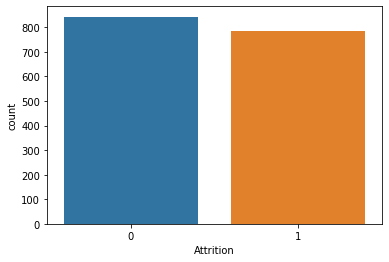

In [19]:
frames = [df_int64, df_cat]
df_num = pd.concat(frames, axis = 1)
df_num.shape
df_num["Attrition"].value_counts()
sns.countplot(df_num.Attrition)

In [20]:
# Choose different ML algorithm to calculate the accuracy and compare it with other algorithms

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    #gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    ]

In [21]:
y= df_num.Attrition
x= df_num.drop(["Attrition"],axis= 1)
feature_name = x.columns
print('Shape of x: {}'.format(x.shape))
print('Shape of y: {}'.format(y.shape))

Shape of x: (1628, 148)
Shape of y: (1628,)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1139, 148)
Number transactions y_train dataset:  (1139,)
Number transactions X_test dataset:  (489, 148)
Number transactions y_test dataset:  (489,)


In [23]:
# ML algorithms may take time to implement depend on the processor

#import pandas as pd
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 10)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 10)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)

    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA Recall,MLA AUC
13,SVC,1.000000,0.979550,1.000000,0.959839,0.979920
2,ExtraTreesClassifier,1.000000,0.963190,0.967611,0.959839,0.963253
4,RandomForestClassifier,0.997366,0.936605,0.932540,0.943775,0.936471
1,BaggingClassifier,1.000000,0.926380,0.901887,0.959839,0.925753
16,ExtraTreeClassifier,1.000000,0.901840,0.862816,0.959839,0.900753
15,DecisionTreeClassifier,1.000000,0.901840,0.862816,0.959839,0.900753
3,GradientBoostingClassifier,0.968393,0.897751,0.893281,0.907631,0.897565
7,RidgeClassifierCV,0.855136,0.822086,0.818898,0.835341,0.821837
5,LogisticRegressionCV,0.852502,0.809816,0.836207,0.779116,0.810392
0,AdaBoostClassifier,0.854258,0.783231,0.796680,0.771084,0.783459


In [24]:
#Feature selection using correlation

num_feats = len(x.columns)

def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(x, y,num_feats)
print(str(len(cor_feature)), 'selected features')

148 selected features


In [25]:
#feature selection using chi2 method

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(x)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = x.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

148 selected features


In [26]:
#Feature selection using RFE method

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = x.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

148 selected features


In [27]:
#Feature selection using LogisticRegression

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = x.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

64 selected features


In [28]:
#feature Selection using Random forest classifier

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(x, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = x.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

40 selected features


In [29]:
#Feature selection using LGBMClassifier

from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(x, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = x.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

30 selected features


In [30]:
# put all selection together
feature_name = x.columns

feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,Years_With_Current_Manager_0,True,True,True,True,True,True,6
2,Years_Since_Last_Promotion_0,True,True,True,True,True,True,6
3,Total_Working_Years,True,True,True,True,True,True,6
4,Stock_Option_Level_1,True,True,True,True,True,True,6
5,Stock_Option_Level_0,True,True,True,True,True,True,6
...,...,...,...,...,...,...,...,...
144,Department_Human Resources,True,True,True,False,False,False,3
145,Communication_Skill_4,True,True,True,False,False,False,3
146,Communication_Skill_3,True,True,True,False,False,False,3
147,Business_Travel_Travel_Rarely,True,True,True,False,False,False,3


In [32]:
print('Shape of X_train: {}'.format(X_train.shape))
print('Shape of y_train: {}'.format(y_train.shape))
print('Shape of X_test: {}'.format(X_test.shape))
print('Shape of y_test: {}'.format(y_test.shape))

Shape of X_train: (1139, 148)
Shape of y_train: (1139,)
Shape of X_test: (489, 148)
Shape of y_test: (489,)


In [ ]:
# Trying linear model LogisticRegressionCV

In [33]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
#x = x.drop(["Years_In_Current_Role_18", "Years_With_Current_Manager_14", "Years_With_Current_Manager_15"],axis=1)
predicted = linear_model.LogisticRegressionCV().fit(X_train, y_train).predict_proba(X_test)
#predicted
prediction = predicted[:,1]
prediction

array([0.31138761, 0.09488687, 0.76909624, 0.06151765, 0.03979484,
       0.2313347 , 0.92137629, 0.57808166, 0.54921142, 0.9067941 ,
       0.03579874, 0.42406849, 0.09679617, 0.03589841, 0.02550382,
       0.32228664, 0.81236868, 0.01992782, 0.47108637, 0.83536696,
       0.96434969, 0.86486327, 0.94210899, 0.46947352, 0.01173205,
       0.51423879, 0.6649754 , 0.91489328, 0.01318595, 0.12803313,
       0.92886795, 0.38537936, 0.51593839, 0.50928893, 0.48482887,
       0.01216842, 0.96926121, 0.19357275, 0.31138761, 0.99077304,
       0.26856756, 0.46570505, 0.20844886, 0.17538894, 0.90787075,
       0.12442289, 0.93426452, 0.0042382 , 0.54675244, 0.21052058,
       0.01422809, 0.55502704, 0.14231514, 0.61401139, 0.09443972,
       0.00635002, 0.71989726, 0.580587  , 0.00776886, 0.05744414,
       0.04189904, 0.00372864, 0.92886795, 0.19581964, 0.34385221,
       0.60820543, 0.01771495, 0.02113734, 0.03915201, 0.9564049 ,
       0.91038826, 0.38091703, 0.93449938, 0.62118726, 0.33641

In [35]:
print('Shape of X_train: {}'.format(X_train.shape))
print('Shape of y_train: {}'.format(y_train.shape))
print('Shape of X_test: {}'.format(X_test.shape))
print('Shape of y_test: {}'.format(y_test.shape))

Shape of X_train: (1139, 148)
Shape of y_train: (1139,)
Shape of X_test: (489, 148)
Shape of y_test: (489,)


In [38]:
# import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# load data and split into training and testing sets
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test

# define parameters to be tuned
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# create a random forest classifier object
rf = RandomForestClassifier(random_state=42)

# create a GridSearchCV object with the specified parameters and cross-validation strategy
grid = GridSearchCV(estimator=rf, param_grid=parameters, cv=3)

# fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# get the best estimator and its hyperparameters
best_estimator = grid.best_estimator_
best_params = grid.best_params_

# make predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# calculate and print precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Best parameters:", best_params)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", cm)

Best parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Precision: 0.9007936507936508
Recall: 0.9116465863453815
F1-score: 0.906187624750499
Confusion Matrix:
 [[215  25]
 [ 22 227]]


Precision: measures the proportion of true positives out of all positive predictions. It is useful when the cost of false positives (predicting an employee will leave when they actually stay) is high.

Recall: measures the proportion of true positives out of all actual positives. It is useful when the cost of false negatives (predicting an employee will stay when they actually leave) is high.

F1-score: a weighted average of precision and recall that balances between the two metrics. It is useful when both false positives and false negatives are important.

AUC-ROC: measures the area under the receiver operating characteristic curve, which plots the true positive rate against the false positive rate at various thresholds. It is useful when the trade-off between false positives and false negatives is uncertain.

In addition, other metrics such as specificity, negative predictive value, and positive predictive value can also be used depending on the specific requirements of the problem. It's important to choose the most appropriate evaluation metric based on the business needs and the specific context of the problem.

# Conclusion

The results of the classification model indicate that it has good predictive performance on the test set. The precision of the model is 0.9008, which means that out of all the employees predicted to leave, 90.08% actually left. The recall of the model is 0.9116, which means that out of all the employees who actually left, 91.16% were correctly identified by the model. The F1-score of the model is 0.9062, which is the harmonic mean of precision and recall and is a good measure of the overall performance of the model.

In general, a high precision value indicates that the model is accurately identifying employees who are likely to leave, while a high recall value indicates that the model is correctly identifying most of the employees who actually left. The F1-score provides a balanced measure of both precision and recall.

It's important to note that the interpretation of these results may vary depending on the specific business context and the associated costs and benefits of different types of errors. However, in general, these results suggest that the random forest classifier with the selected hyperparameters is a good candidate model for predicting employee attrition.

# Modular code, although it is provided in separate python file

In [5]:
import pandas as pd

def load_data(filepath):
    """
    Load data from a CSV file.

    Args:
        filepath (str): The path to the CSV file.

    Returns:
        pandas.DataFrame: The loaded data.
    """
    data = pd.read_csv(filepath)
    return data

def rename_columns(data):
    """
    Rename columns in a DataFrame.

    Args:
        data (pandas.DataFrame): The DataFrame containing the data.

    Returns:
        pandas.DataFrame: The DataFrame with renamed columns.
    """
    renamed_columns = {
        'Id': 'Id',
        'Age': 'Age',
        'Attrition': 'Attrition',
        'BusinessTravel': 'Business_Travel',
        'Department': 'Department',
        'DistanceFromHome': 'Distance_From_Home',
        'Education': 'Education',
        'EducationField': 'Education_Field',
        'EmployeeNumber': 'Employee_Number',
        'EnvironmentSatisfaction': 'Environment_Satisfaction',
        'Gender': 'Gender',
        'JobInvolvement': 'Job_Involvement',
        'JobRole': 'Job_Role',
        'JobSatisfaction': 'Job_Satisfaction',
        'MaritalStatus': 'Marital_Status',
        'MonthlyIncome': 'Monthly_Income',
        'NumCompaniesWorked': 'Number_Of_Companies_Worked',
        'OverTime': 'Over_Time',
        'PercentSalaryHike': 'Percent_Salary_Hike',
        'PerformanceRating': 'Performance_Rating',
        'StockOptionLevel': 'Stock_Option_Level',
        'TotalWorkingYears': 'Total_Working_Years',
        'TrainingTimesLastYear': 'Training_Times_Last_Year',
        'YearsAtCompany': 'Years_At_Company',
        'YearsInCurrentRole': 'Years_In_Current_Role',
        'YearsSinceLastPromotion': 'Years_Since_Last_Promotion',
        'YearsWithCurrManager': 'Years_With_Current_Manager',
        'CommunicationSkill': 'Communication_Skill',
        'Behaviour': 'Behaviour'
    }

    data = data.rename(columns=renamed_columns)
    return data


In [6]:
def preprocess_data(data):
    # select categorical columns
    column = ['Business_Travel', 'Department', 'Education', 'Education_Field', 'Environment_Satisfaction', 'Gender',
              'Job_Involvement', 'Job_Role', 'Job_Satisfaction', 'Marital_Status', 'Number_Of_Companies_Worked',
              'Over_Time', 'Percent_Salary_Hike', 'Performance_Rating', 'Stock_Option_Level', 'Training_Times_Last_Year',
              'Years_In_Current_Role', 'Years_Since_Last_Promotion', 'Years_With_Current_Manager',
              'Communication_Skill', 'Behaviour']

    # one-hot encode categorical columns
    df_cat = pd.get_dummies(data[column], columns=column, prefix=column)

    # select numerical columns
    columns = ['Age','Distance_From_Home','Employee_Number','Monthly_Income','Total_Working_Years','Years_At_Company','Attrition']
    df_int64 = data[columns]

    # concatenate numerical and categorical dataframes
    df_num = pd.concat([df_int64, df_cat], axis=1)

    return df_num

In [31]:
def create_model(X_train, X_test, y_train, y_test):
    # import necessary libraries
    
    # load data and split into training and testing sets
    X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test

    # define parameters to be tuned
    parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
    }

    # create a random forest classifier object
    rf = RandomForestClassifier(random_state=42)

    cv = GridSearchCV(estimator = rf, param_grid=parameters, cv=3)
    cv.fit(X_train, y_train)

    # extract the best estimator from the grid search results
    best_estimator = cv.best_estimator_

    # extract the best parameters from the grid search results
    best_params = cv.best_params_

    return cv, best_estimator, best_params
    
def display_results(cv, y_test, X_test, best_params, best_estimator):

    # make predictions on the test set using the best estimator
    y_pred = best_estimator.predict(X_test)

    # calculate and print precision, recall, and F1-score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("Best parameters:", best_params)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Confusion Matrix:\n", cm)
    

In [34]:
def main():
    data = load_data('train.csv')
    data = rename_columns(data)
    df_num = preprocess_data(data)
    test_size = 0.3
    random_state=0
    
    y= df_num.Attrition
    x= df_num.drop(["Attrition"],axis= 1)
    
    X_train, X_test, y_train, y_test = train_test_split(x, y)
    
    cv, best_estimator, best_params = create_model(X_train, X_test, y_train, y_test)
    
    display_results(cv, y_test, X_test, best_params, best_estimator)

main()

Best parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Precision: 0.9047619047619048
Recall: 0.8814432989690721
F1-score: 0.8929503916449086
Confusion Matrix:
 [[195  18]
 [ 23 171]]
